In [1]:
import pandas as pd
import numpy as np 

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
x=df.drop(['variety'],axis=1)
y=df['variety']

In [4]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

features = x_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)

explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values))*100)

print("variances of each feature",explained_variances)

variances of each feature [72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


In [5]:
projected_1 = x_scaled.dot(vectors.T[0])
projected_2 = x_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,Setosa
1,-2.080961,0.674134,Setosa
2,-2.364229,0.341908,Setosa
3,-2.299384,0.597395,Setosa
4,-2.389842,-0.646835,Setosa


Text(0.5, 0, 'Dimensions')

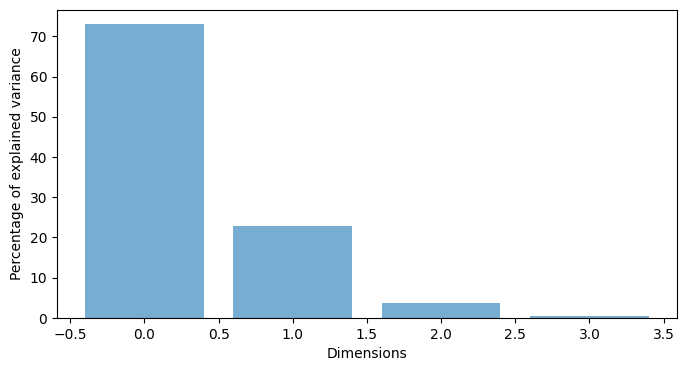

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

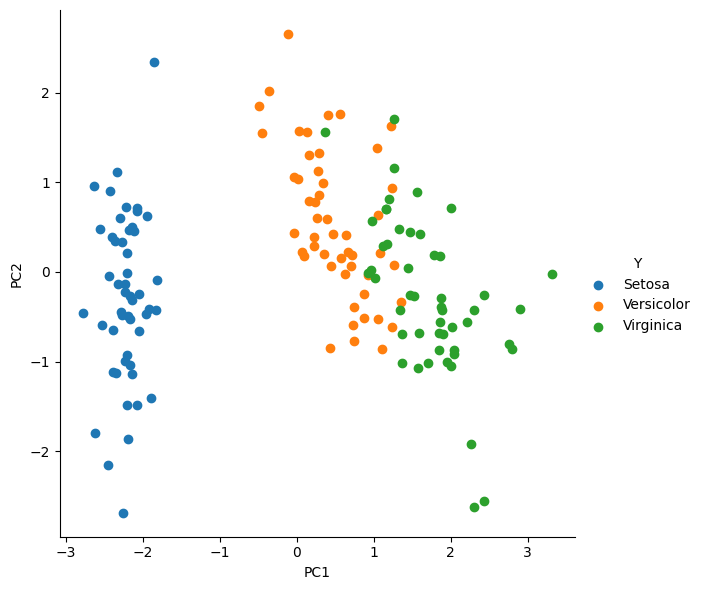

In [7]:
import seaborn as sns

sns.FacetGrid(res, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()